# Minor Project 3 - Logistic Regression

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import Dataset

In [ ]:
df = pd.read_csv("/content/framingham.csv")

## Initial Analysis

In [ ]:
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None


In [ ]:
print(df.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   

## Check for Duplicates

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB
None



## Outlier Detection and Correction






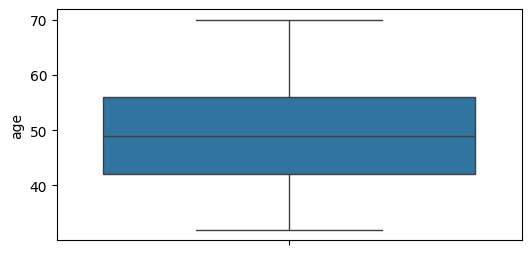

<Figure size 640x480 with 0 Axes>

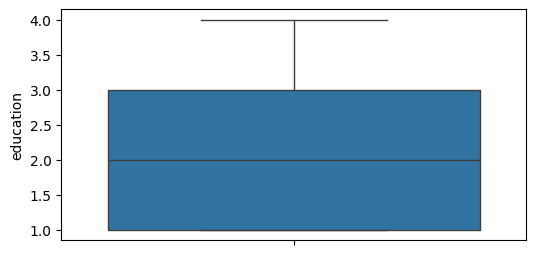

<Figure size 640x480 with 0 Axes>

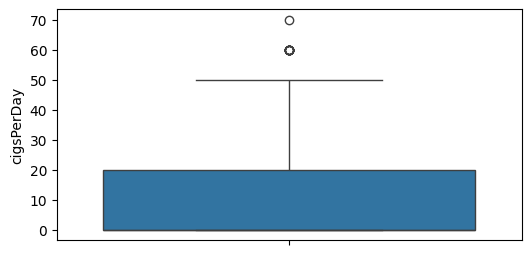

<Figure size 640x480 with 0 Axes>

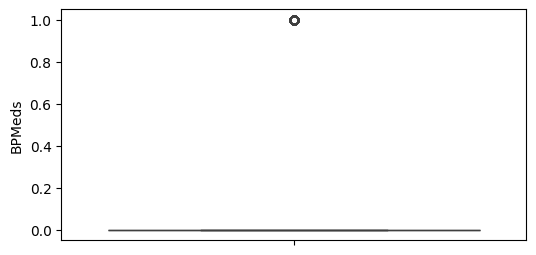

<Figure size 640x480 with 0 Axes>

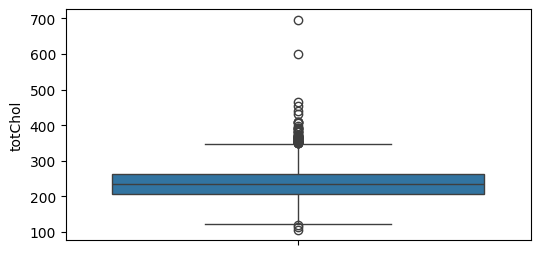

<Figure size 640x480 with 0 Axes>

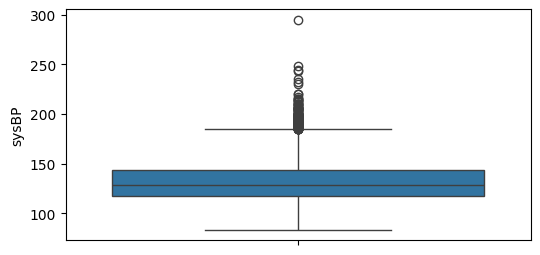

<Figure size 640x480 with 0 Axes>

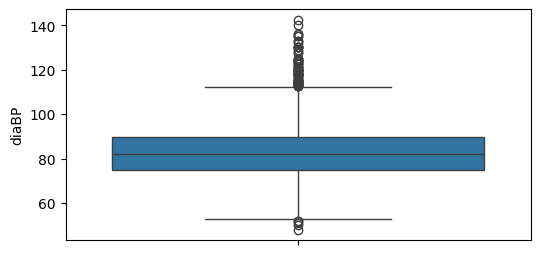

<Figure size 640x480 with 0 Axes>

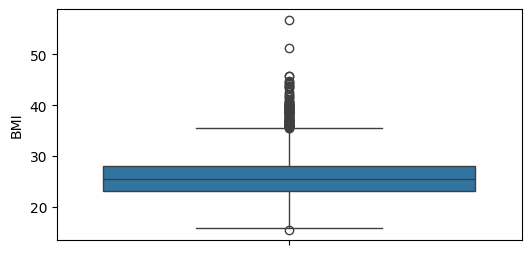

<Figure size 640x480 with 0 Axes>

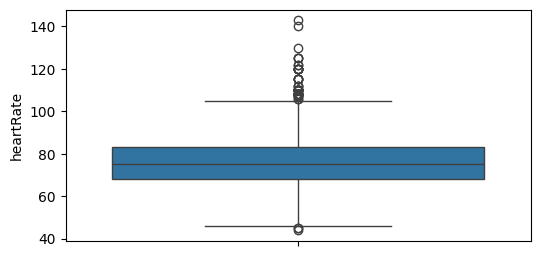

<Figure size 640x480 with 0 Axes>

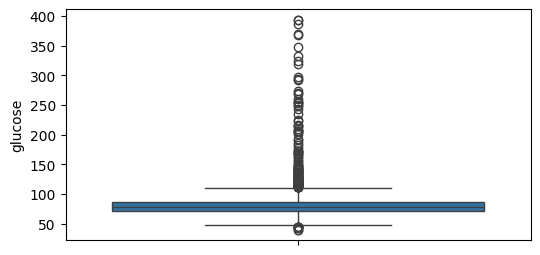

<Figure size 640x480 with 0 Axes>

In [ ]:
num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
bool_cols = [col for col in num_cols if set(df[col].unique()) <= {0, 1}]

num_cols = [col for col in num_cols if col not in bool_cols]

for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)


In [ ]:
def outlier_correction(df, col, show_plot=True):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

    return df

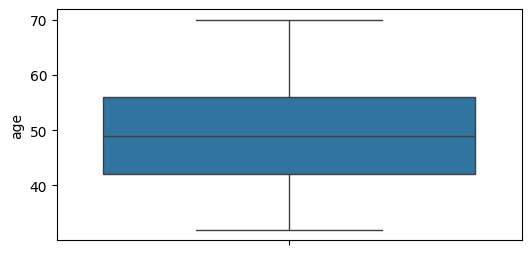

<Figure size 640x480 with 0 Axes>

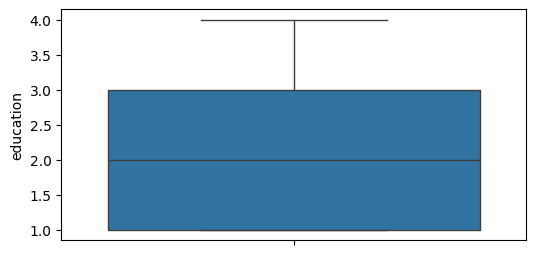

<Figure size 640x480 with 0 Axes>

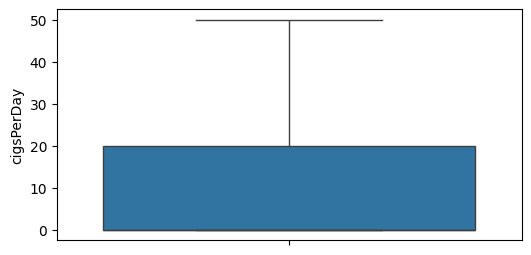

<Figure size 640x480 with 0 Axes>

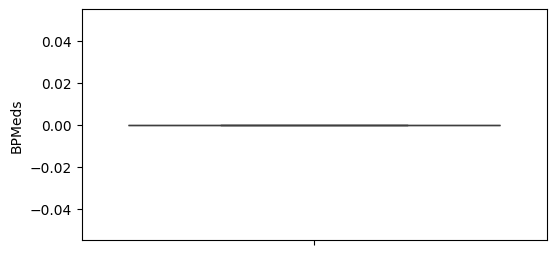

<Figure size 640x480 with 0 Axes>

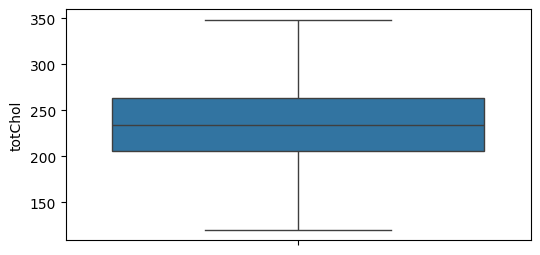

<Figure size 640x480 with 0 Axes>

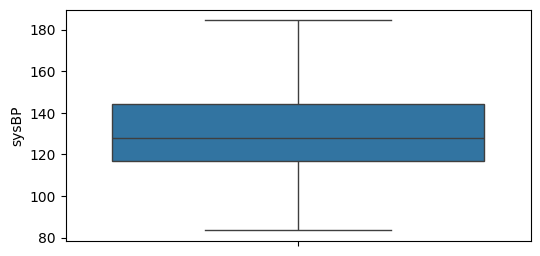

<Figure size 640x480 with 0 Axes>

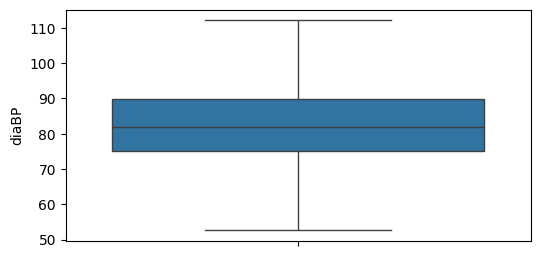

<Figure size 640x480 with 0 Axes>

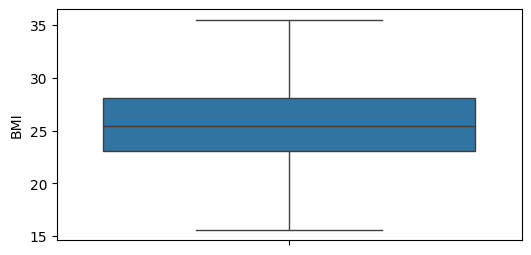

<Figure size 640x480 with 0 Axes>

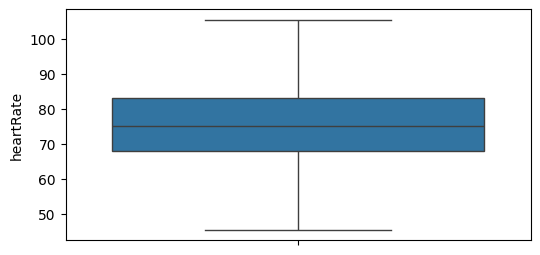

<Figure size 640x480 with 0 Axes>

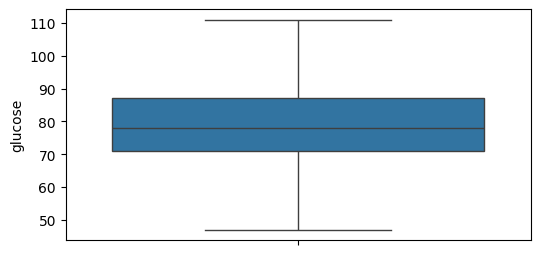

<Figure size 640x480 with 0 Axes>

In [ ]:
for col in num_cols:
    df = outlier_correction(df, col, show_plot=True)
    plt.figure(figsize=(6,3))
    sns.boxplot(y=df[col])
    plt.show()
    plt.tight_layout()
    plt.pause(0.5)

## Handling Missing Values

In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ["float64", "int64"]:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-1156349246.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   float64
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(10), int64(6)
memory usage: 529.9 KB
None


## Bivariate Analysis

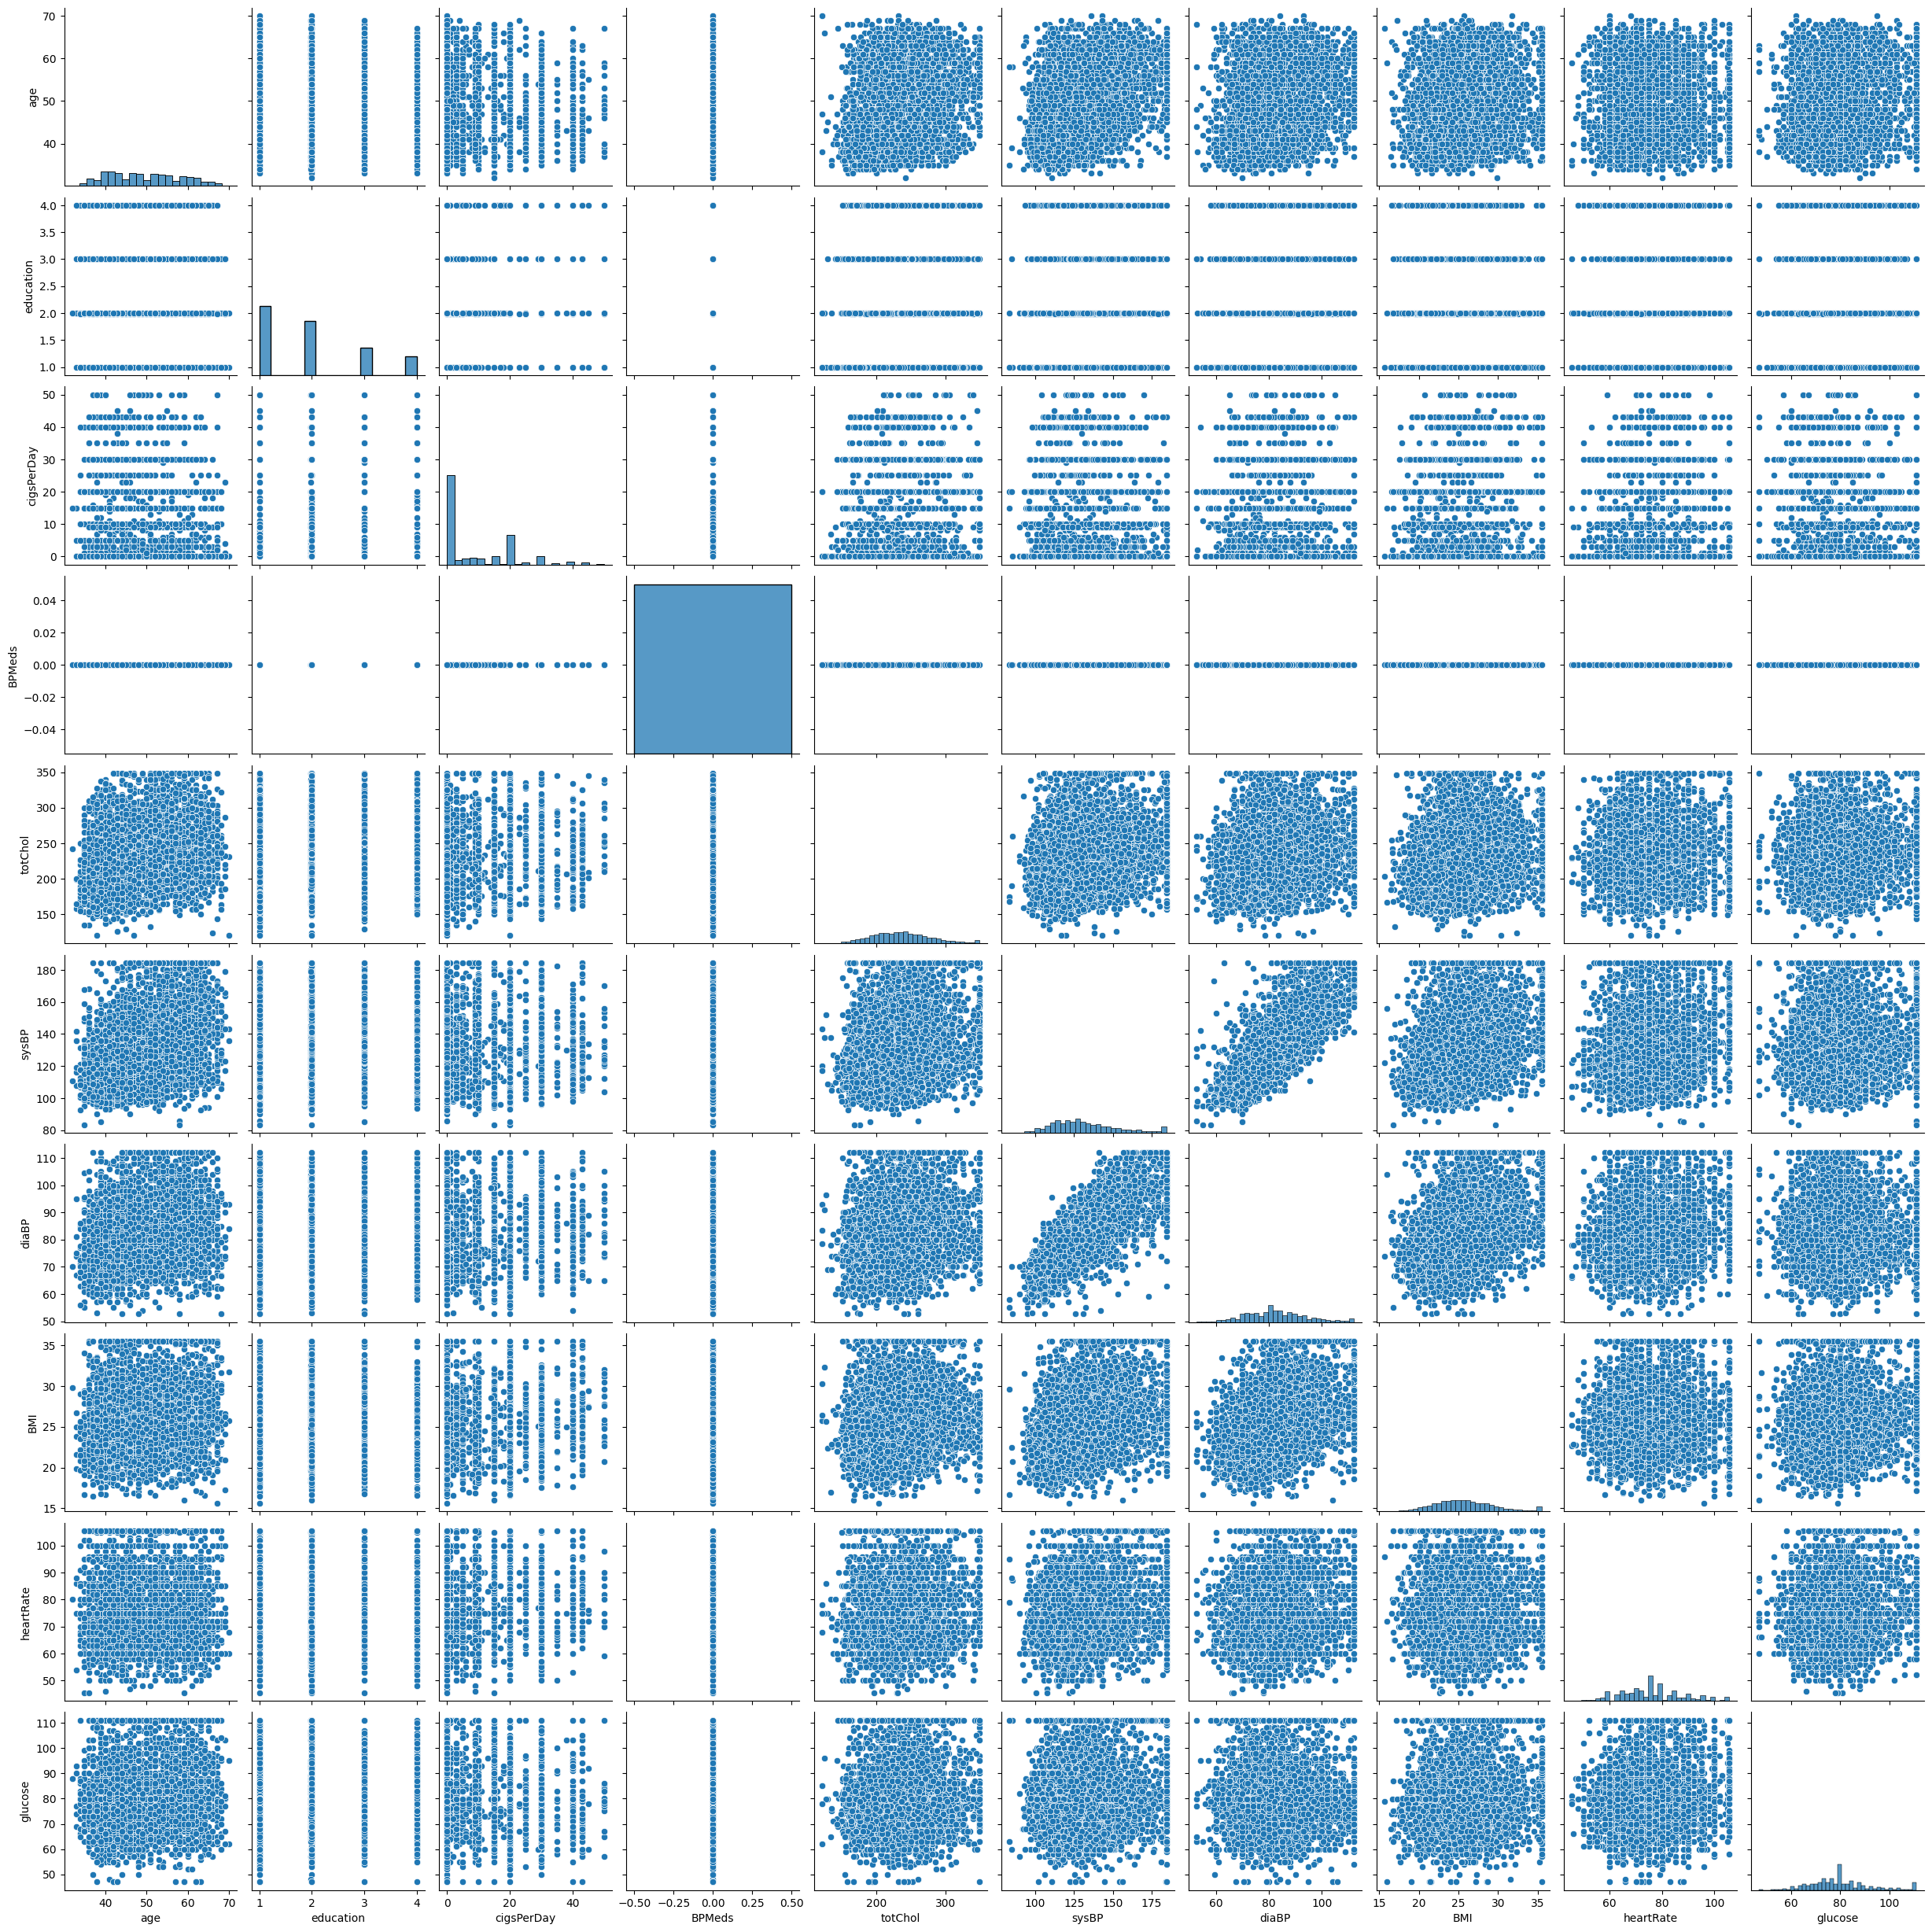

In [ ]:
sns.pairplot(df[num_cols])
plt.show()

## Correlation and Heatmap

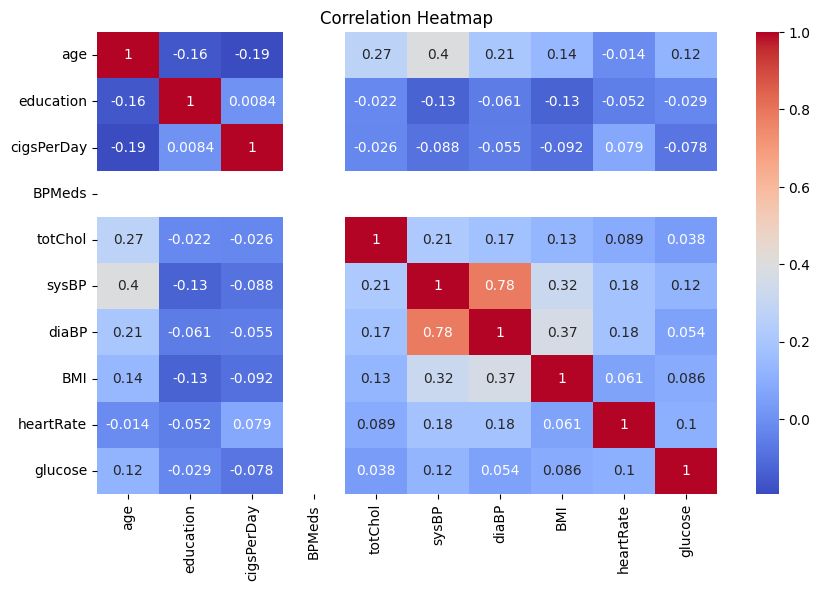

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Normalisation and Scaling

In [ ]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df.head())

   male       age  education  currentSmoker  cigsPerDay  BPMeds  \
0     1 -1.234951   2.007088              0   -0.763176     0.0   
1     0 -0.418257   0.020905              0   -0.763176     0.0   
2     1 -0.184916  -0.972187              1    0.938026     0.0   
3     0  1.331800   1.013996              1    1.788627     0.0   
4     0 -0.418257   1.013996              1    1.193206     0.0   

   prevalentStroke  prevalentHyp  diabetes   totChol     sysBP     diaBP  \
0                0             0         0 -0.973368 -1.255196 -1.118089   
1                0             0         0  0.324501 -0.528621 -0.152197   
2                0             0         0  0.206513 -0.213772 -0.240006   
3                0             1         0 -0.265439  0.876090  1.077119   
4                0             0         0  1.150418 -0.092676  0.111228   

        BMI  heartRate   glucose  TenYearCHD  
0  0.330564   0.365620 -0.239238           0  
1  0.795016   1.656276 -0.320951           0  

## Encoding

In [ ]:
df = pd.get_dummies(df, drop_first=True).astype(int)

print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   -1          2              0           0       0                0   
1     0    0          0              0           0       0                0   
2     1    0          0              1           0       0                0   
3     0    1          1              1           1       0                0   
4     0    0          1              1           1       0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI  heartRate  glucose  \
0             0         0        0     -1     -1    0          0        0   
1             0         0        0      0      0    0          1        0   
2             0         0        0      0      0    0          0        0   
3             1         0        0      0      1    0          0        1   
4             0         0        1      0      0    0          0        0   

   TenYearCHD  
0           0  
1           0  
2           0 

## Logistic Regression

In [ ]:
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

LogisticRegression(class_weight='balanced', max_iter=500)

### Without considering class imbalancy

In [ ]:
model = LogisticRegression(max_iter=500, penalty="l2", solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.847877358490566
Confusion Matrix:
 [[716   3]
 [126   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       719
           1       0.50      0.02      0.04       129

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.48       848
weighted avg       0.80      0.85      0.78       848



### Considering class imbalancy

In [ ]:
model = LogisticRegression(max_iter=500, class_weight='balanced', penalty="l2", solver="lbfgs")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.660377358490566
Confusion Matrix:
 [[487 232]
 [ 56  73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.68      0.77       719
           1       0.24      0.57      0.34       129

    accuracy                           0.66       848
   macro avg       0.57      0.62      0.55       848
weighted avg       0.80      0.66      0.71       848

